In [1]:
import numpy as np
import pandas as pd 
import cv2
# Graficar datos de entrada
import matplotlib.pyplot as plt # cargamos parque para plotear datos
import os

# Dataset tomado de [Kaggle](https://www.kaggle.com/datasets/ahemateja19bec1025/traffic-sign-dataset-classification?resource=download&select=traffic_Data)

In [2]:
# Montar unidad de google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Cargar dataset de drive

In [3]:
data_path = "/content/data/Datos_Signals"
# crear carpeta de data si no existe
if not os.path.exists('data'):
  os.mkdir('data')
# se descomprime los datos si aun no se ha hecho
!test -d /content/data/Datos_Signals && echo "El directorio ya existe" || unzip /content/gdrive/MyDrive/MaIE/Semestre3/RL/Talleres/Datos_Signals.zip -d /content/data

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00012_00019.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_00012_00018.png  
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00012_00018.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_00003_00017.png  
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00003_00017.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_00012_00024.png  
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00012_00024.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_00003_00003.png  
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00003_00003.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_00021_00022.png  
  inflating: /content/data/__MACOSX/Datos_Signals/Train/14/._00014_00021_00022.png  
  inflating: /content/data/Datos_Signals/Train/14/00014_000

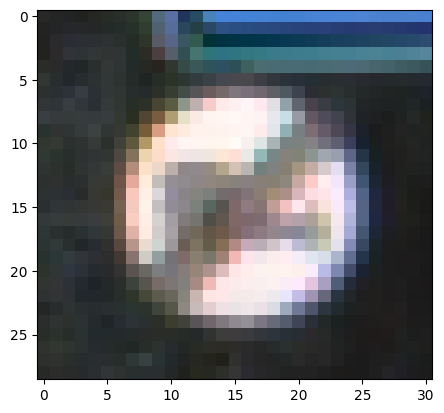

In [4]:
# cargar imagen de prueba
img = cv2.imread(data_path + '/Train/42/00042_00000_00004.png')
plt.imshow(img)

# Preparación de los dataset

In [5]:
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow as tf
import glob

# se define la ruta de los datos de entrenamiento
train_dir = data_path + '/Train'
test_dir = data_path + '/Test'

# se genera un dataset a partir del directorio de las imágenes
train_dataset = image_dataset_from_directory(train_dir, validation_split=0.2,
															subset='training',
															image_size=(
																32, 32),
															seed=123,
															batch_size=32)

# se genera el dataset de validación
valid_dataset = image_dataset_from_directory(train_dir, validation_split=0.2,
															subset='validation',
															image_size=(
																32, 32),
															seed=123,
															batch_size=32)


num_classes = len(train_dataset.class_names)
print("número de clases", num_classes)

Found 39209 files belonging to 43 classes.
Using 31368 files for training.
Found 39209 files belonging to 43 classes.
Using 7841 files for validation.
número de clases 43


# Visualizar imagenes con su clase

32


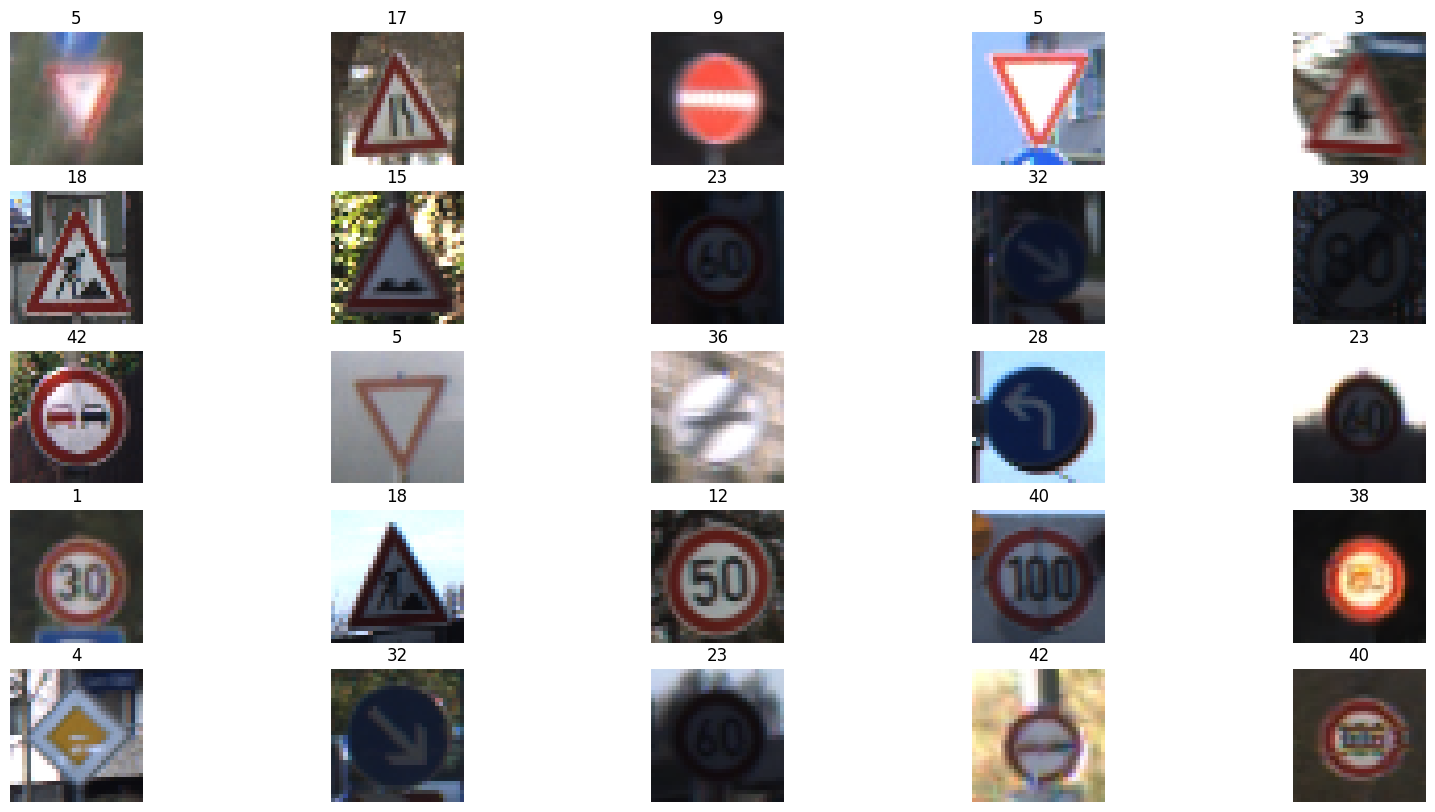

In [6]:
plt.figure(figsize=(20, 10))
for images, labels in train_dataset.take(1):
    print(len(labels.numpy()))
    for i in range(25):
        ax = plt.subplot(5, 5, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(labels[i].numpy())
        plt.axis("off")
  
plt.show()

# Definición de la arquitectura del modelo

In [7]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers.experimental.preprocessing import Rescaling

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3))) # 32x32x3
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


# Definición de función de costo y optimizador

In [8]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

# Entrenamiento de la red neuronal

In [9]:
from tensorflow.keras.callbacks import EarlyStopping
# Set callback functions to early stop training
mycallbacks = [EarlyStopping(monitor='val_loss', patience=20)]
history = model.fit(train_dataset,
                 validation_data=valid_dataset,
                 epochs=50,
                 callbacks=mycallbacks)

Epoch 1/50
981/981 [==============================] - 24s 12ms/step - loss: 1.6778 - accuracy: 0.5686 - val_loss: 0.3943 - val_accuracy: 0.8976
Epoch 2/50
981/981 [==============================] - 12s 12ms/step - loss: 0.3740 - accuracy: 0.8944 - val_loss: 0.1670 - val_accuracy: 0.9554
Epoch 3/50
981/981 [==============================] - 13s 13ms/step - loss: 0.2176 - accuracy: 0.9382 - val_loss: 0.1816 - val_accuracy: 0.9518
Epoch 4/50
981/981 [==============================] - 13s 13ms/step - loss: 0.1714 - accuracy: 0.9531 - val_loss: 0.0933 - val_accuracy: 0.9753
Epoch 5/50
981/981 [==============================] - 13s 13ms/step - loss: 0.1536 - accuracy: 0.9587 - val_loss: 0.0857 - val_accuracy: 0.9787
Epoch 6/50
981/981 [==============================] - 15s 15ms/step - loss: 0.1373 - accuracy: 0.9652 - val_loss: 0.0798 - val_accuracy: 0.9804
Epoch 7/50
981/981 [==============================] - 13s 13ms/step - loss: 0.1279 - accuracy: 0.9658 - val_loss: 0.0750 - val_accuracy:

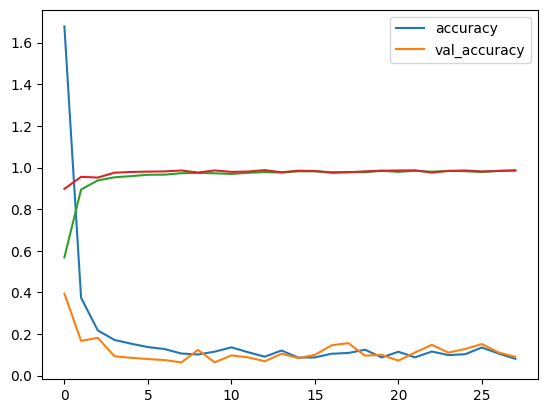

In [10]:
# Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'], loc='upper right')

# Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'], loc='upper right')


# Guardar modelo

In [11]:
import os
from tensorflow.keras.models import save_model
os.mkdir('model')
save_model(model, 'model')

In [12]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/assets/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 88%)
  adding: content/model/fingerprint.pb (stored 0%)
  adding: content/model/keras_metadata.pb (deflated 91%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.index (deflated 63%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 13%)
